# Imports

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# Data acquisition

In [2]:
data_path = Path('.') / 'data'
filenames = {
    'x_train': 'AMF_train_X_XCZw8r3.csv',
    'y_train': 'AMF_train_Y_omYQJZL.csv',
    'x_test':'AMF_test_X_uDs0jHH.csv',
}

In [3]:
x_train = pd.read_csv(data_path / filenames['x_train'])
y_train = pd.read_csv(data_path / filenames['y_train'])
x_test = pd.read_csv(data_path / filenames['x_test'])

In [4]:
with pd.option_context('display.max_columns', None):
    display(x_train)

,Index,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,75_p_time_two_events,90_p_time_two_events,max_time_two_events,min_lifetime_cancel,mean_lifetime_cancel,10_p_lifetime_cancel,med_lifetime_cancel,25_p_lifetime_cancel,75_p_lifetime_cancel,90_p_lifetime_cancel,max_lifetime_cancel,NbTradeVenueMic,MaxNbTradesBySecond,MeanNbTradesBySecond,min_dt_TV1,mean_dt_TV1,med_dt_TV1,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
0,1,Isin_8,Date_24,Trader_10,2.272727,8.333333,12.500000,0.0,5117.830300,0.000000,419.688500,10.722543,984.320560,23151.83800,25139.59800,682.153260,8272.770569,682.153260,984.32056,682.15326,23151.83800,23151.8380,23151.8380,1,7,2.750000,351.702399,9639.216031,1585.079495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1,2,Isin_87,Date_29,Trader_10,1.696629,25.166667,21.571429,0.0,1846.968401,0.000074,0.003374,0.000204,8.768699,2671.48830,31278.35700,11.866026,3796.632686,11.866026,177.93991,73.74323,808.26230,21433.6840,21433.6840,1,17,5.933333,0.000066,493.559196,0.000901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
2,3,Isin_87,Date_23,Trader_10,1.482759,47.300000,118.250000,0.0,686.300630,0.000071,0.000599,0.000129,5.725427,448.88360,30799.46700,2.761036,1397.103679,2.761036,187.99548,19.77734,418.23984,1953.6235,10842.4640,1,20,5.063492,0.000018,163.954785,0.000770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63
3,4,Isin_12,Date_11,Trader_10,1.705882,14.500000,29.000000,0.0,2174.335265,0.000000,6.152666,0.000945,62.444176,19187.71900,19187.71900,286.019320,9736.869034,286.019320,286.01932,286.01932,19187.71900,19187.7190,19187.7190,1,8,4.250000,0.000148,1232.562133,0.004301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,5,Isin_87,Date_9,Trader_10,1.517730,26.750000,NaN,0.0,944.008551,0.000071,0.001364,0.000146,2.225420,273.45676,23164.51400,2.798452,10066.803992,2.798452,1345.95280,662.57434,21903.78300,23164.5140,23164.5140,1,19,3.710526,0.000025,248.073927,0.001364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105777,105778,Isin_84,Date_27,Trader_60,1.150000,23.000000,NaN,0.0,736.500080,0.000000,0.000188,0.000039,0.003226,1228.04750,7609.94340,7609.944300,7609.944336,7609.944300,7609.94430,7609.94430,7609.94430,7609.9443,7609.9443,1,15,6.666667,0.001000,927.968000,0.004000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
105778,105779,Isin_102,Date_18,Trader_60,1.352941,23.000000,NaN,0.0,63.672695,0.000000,0.000963,0.000176,70.822190,307.08710,392.75638,567.153000,567.153015,567.153000,567.15300,567.15300,567.15300,567.1530,567.1530,1,4,2.428571,0.001000,143.065500,0.569000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
105779,105780,Isin_12,Date_13,Trader_60,1.146667,86.000000,NaN,0.0,708.440816,0.000000,0.000578,0.000062,1.023857,4.95412,23448.52500,23448.525000,23448.525391,23448.525000,23448.52500,23448.52500,23448.52500,23448.5250,23448.5250,1,21,4.687500,0.001000,1157.596000,2.488000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
105780,105781,Isin_27,Date_30,Trader_60,1.179191,204.000000,NaN,0.0,384.893976,0.000000,0.000536,0.000242,1.288446,119.05335,19157.80900,19157.809000,19157.808594,19157.809000,19157.80900,19157.80900,19157.80900,19157.8090,19157.8090,1,30,4.942857,0.001000,435.646015,1.001000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35


In [5]:
y_train

,Trader,type
0,Trader_285,MIX
1,Trader_114,NON HFT
2,Trader_110,NON HFT
3,Trader_57,NON HFT
4,Trader_128,NON HFT
...,...,...
81,Trader_140,MIX
82,Trader_451,MIX
83,Trader_438,MIX
84,Trader_278,HFT


# Exploration

In [6]:
with pd.option_context('display.max_columns', None):
    display(x_train.describe(include='all'))

,Index,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,75_p_time_two_events,90_p_time_two_events,max_time_two_events,min_lifetime_cancel,mean_lifetime_cancel,10_p_lifetime_cancel,med_lifetime_cancel,25_p_lifetime_cancel,75_p_lifetime_cancel,90_p_lifetime_cancel,max_lifetime_cancel,NbTradeVenueMic,MaxNbTradesBySecond,MeanNbTradesBySecond,min_dt_TV1,mean_dt_TV1,med_dt_TV1,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
count,105782.000000,105782,105782,105782,104099.000000,105782.000000,58170.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,101547.000000,101547.000000,101547.000000,80606.000000,80606.000000,80606.000000,80527.000000,80527.000000,80527.000000,80634.000000,80634.000000,80634.000000,105782.000000
unique,NaN,119,22,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Isin_102,Date_7,Trader_209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1368,5034,10208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,52891.500000,NaN,NaN,NaN,34.435038,17.458787,164.469153,87.472164,2772.513578,103.310102,1011.630575,228.659560,4734.942457,9786.032539,24292.035085,1945.038027,5616.519744,2070.233540,4445.109364,2707.080480,8451.108964,11587.949910,19980.278762,5.563896,25.249324,2.093446,438.447418,1082.427774,651.743386,297.616104,598.637740,389.411017,310.498829,605.733603,401.594794,309.912605,615.154194,402.749527,334.034070
std,30536.777425,NaN,NaN,NaN,137.261154,71.843225,929.010848,1549.972501,4985.149536,1617.051421,4967.426924,2319.866837,10431.964706,14256.357615,17772.438572,6672.112738,9140.189971,6809.714060,9372.947978,7531.875480,13270.509124,15667.418368,17654.559859,4.385260,35.264111,1.417188,2876.755745,3187.357171,2931.984342,1882.353978,2010.296401,1896.835552,1922.648030,2031.797111,1933.073024,1910.028651,2037.041672,1923.023720,644.816702
min,1.000000,NaN,NaN,NaN,1.044444,2.000000,1.001960,0.000000,0.000065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000065,0.000007,0.000038,0.000016,0.000035,0.000028,0.000038,0.000038,0.000038,1.000000,1.000000,1.000000,0.000001,0.000001,0.000001,0.000001,0.000002,0.000001,0.000001,0.000003,0.000002,0.000001,0.000008,0.000003,1.000000
25%,26446.250000,NaN,NaN,NaN,3.709023,2.753802,3.253655,0.000000,69.365666,0.000000,1.243868,0.000024,22.249021,117.771340,4410.907350,0.000583,67.897392,0.043414,6.234451,0.746623,30.724017,109.431107,1902.260450,2.000000,6.000000,1.500000,0.000007,50.921032,4.915512,0.000005,33.819189,2.533583,0.000006,32.699571,2.305276,0.000020,33.713187,2.639113,24.000000
50%,52891.500000,NaN,NaN,NaN,7.346154,4.789474,14.000000,0.000000,262.325253,0.000109,10.154920,0.093957,114.957445,480.715195,30166.389500,0.044144,272.333702,1.663752,35.734245,8.251923,182.259375,596.792220,17972.680000,5.000000,14.000000,1.880000,0.000091,183.022816,36.457000,0.000232,110.427370,22.413161,0.000260,111.633327,23.665962,0.000270,113.158721,23.435835,97.000000
75%,79336.750000,NaN,NaN,NaN,22.707956,16.366667,73.689116,0.000000,3801.273320,0.020739,60.552090,2.836749,2277.450350,20975.263250,37485.990000,35.497842,9185.177948,69.218030,2075.455025,254.888130,16302.060250,23952.383000,35716.844000,8.000000,30.000000,2.313703,0.001000,714.761762,227.236491,0.008000,367.974973,121.244211,0.051880,376.874393,127.408500,0.059669,380.865913,128.108940,342.000000


In [7]:
numeric_cols = x_train.select_dtypes(include=[np.number]).columns.to_list()

scaler = StandardScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train[numeric_cols]), columns=numeric_cols)
non_numeric_cols = x_train.select_dtypes(exclude=[np.number]).columns.to_list()
non_numeric_cols
x_train_scaled = x_train[non_numeric_cols].join(x_train_scaled)

In [8]:
n_components = 6
pca = PCA(n_components=n_components,)
pca_df = pd.DataFrame(
    pca.fit_transform(x_train_scaled[numeric_cols].fillna(0)),
    columns=['pca_' + str(i) for i in range(n_components)]
)
x_train_scaled = pca_df.join(x_train_scaled)
x_train_scaled

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,Share,Day,Trader,Index,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
0,1.265453,-0.130330,-0.584401,0.759097,-1.849396,-0.664518,Isin_8,Date_24,Trader_10,-1.732034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.511829
1,-0.416067,0.343482,-0.371292,0.123275,-0.149511,-0.302962,Isin_87,Date_29,Trader_10,-1.732002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.494769
2,-0.903781,0.797979,0.071209,0.368689,0.084000,-0.359762,Isin_87,Date_23,Trader_10,-1.731969,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.420329
3,0.296146,-0.153084,-0.551014,0.299099,-0.251065,-0.829738,Isin_12,Date_11,Trader_10,-1.731936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.511829
4,0.113581,-0.119120,-0.685578,0.327889,0.131717,-0.450292,Isin_87,Date_9,Trader_10,-1.731903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.459100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105777,0.057809,0.352977,0.717392,1.586678,1.178481,0.179854,Isin_84,Date_27,Trader_60,1.731903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.513379
105778,-1.283999,1.317272,1.032004,0.858964,0.645391,-1.142759,Isin_102,Date_18,Trader_60,1.731936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.507176
105779,3.178716,-2.088387,-0.048649,3.389545,3.036608,1.656171,Isin_12,Date_13,Trader_60,1.731969,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.493219
105780,2.357273,-1.497625,0.058168,3.115822,2.770632,1.497273,Isin_27,Date_30,Trader_60,1.732002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.463753


In [9]:
x_train_scaled = x_train_scaled.set_index('Trader').join(y_train.set_index('Trader'))
x_train_scaled

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,Share,Day,Index,OTR,...,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade,type
Trader,,,,,,,,,,,,,,,,,,,,,
Trader_10,1.265453,-0.130330,-0.584401,0.759097,-1.849396,-0.664518,Isin_8,Date_24,-1.732034,-0.234316,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.511829,NON HFT
Trader_10,-0.416067,0.343482,-0.371292,0.123275,-0.149511,-0.302962,Isin_87,Date_29,-1.732002,-0.238513,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.494769,NON HFT
Trader_10,-0.903781,0.797979,0.071209,0.368689,0.084000,-0.359762,Isin_87,Date_23,-1.731969,-0.240071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.420329,NON HFT
Trader_10,0.296146,-0.153084,-0.551014,0.299099,-0.251065,-0.829738,Isin_12,Date_11,-1.731936,-0.238446,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.511829,NON HFT
Trader_10,0.113581,-0.119120,-0.685578,0.327889,0.131717,-0.450292,Isin_87,Date_9,-1.731903,-0.239816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.459100,NON HFT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Trader_60,0.057809,0.352977,0.717392,1.586678,1.178481,0.179854,Isin_84,Date_27,1.731903,-0.242495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.513379,NON HFT
Trader_60,-1.283999,1.317272,1.032004,0.858964,0.645391,-1.142759,Isin_102,Date_18,1.731936,-0.241017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.507176,NON HFT
Trader_60,3.178716,-2.088387,-0.048649,3.389545,3.036608,1.656171,Isin_12,Date_13,1.731969,-0.242520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.493219,NON HFT


In [10]:
mapping = {
    'NON HFT': 0, 
    'MIX': 1,    
    'HFT': 2,
}
x_train_scaled['int_y'] = x_train_scaled.type.map(mapping)
x_train_scaled

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,Share,Day,Index,OTR,...,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade,type,int_y
Trader,,,,,,,,,,,,,,,,,,,,,
Trader_10,1.265453,-0.130330,-0.584401,0.759097,-1.849396,-0.664518,Isin_8,Date_24,-1.732034,-0.234316,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.511829,NON HFT,0
Trader_10,-0.416067,0.343482,-0.371292,0.123275,-0.149511,-0.302962,Isin_87,Date_29,-1.732002,-0.238513,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.494769,NON HFT,0
Trader_10,-0.903781,0.797979,0.071209,0.368689,0.084000,-0.359762,Isin_87,Date_23,-1.731969,-0.240071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.420329,NON HFT,0
Trader_10,0.296146,-0.153084,-0.551014,0.299099,-0.251065,-0.829738,Isin_12,Date_11,-1.731936,-0.238446,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.511829,NON HFT,0
Trader_10,0.113581,-0.119120,-0.685578,0.327889,0.131717,-0.450292,Isin_87,Date_9,-1.731903,-0.239816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.459100,NON HFT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Trader_60,0.057809,0.352977,0.717392,1.586678,1.178481,0.179854,Isin_84,Date_27,1.731903,-0.242495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.513379,NON HFT,0
Trader_60,-1.283999,1.317272,1.032004,0.858964,0.645391,-1.142759,Isin_102,Date_18,1.731936,-0.241017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.507176,NON HFT,0
Trader_60,3.178716,-2.088387,-0.048649,3.389545,3.036608,1.656171,Isin_12,Date_13,1.731969,-0.242520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.493219,NON HFT,0


In [11]:
x_train_scaled.groupby('type').size()

type
HFT        31950
MIX        51483
NON HFT    22349
dtype: int64

<AxesSubplot:xlabel='pca_0', ylabel='pca_1'>

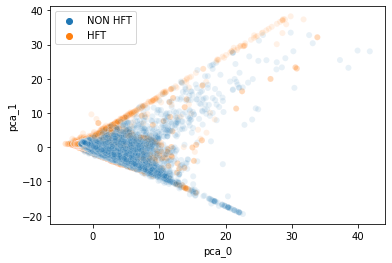

In [17]:
sns.scatterplot(
    data=x_train_scaled.loc[x_train_scaled.type != 'MIX'],
    x='pca_0',
    y='pca_1',
    alpha=.1,
    hue=x_train_scaled.loc[x_train_scaled.type != 'MIX', 'type'].to_list(),
)

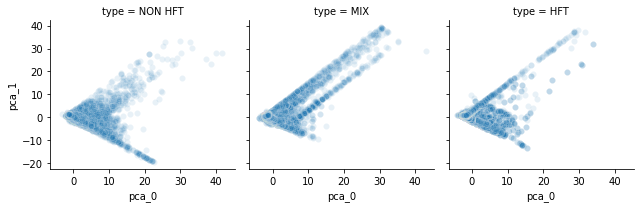

In [18]:
g = sns.FacetGrid(data=x_train_scaled, col='type')
g.map(sns.scatterplot, 'pca_0', 'pca_1', alpha=.1, )

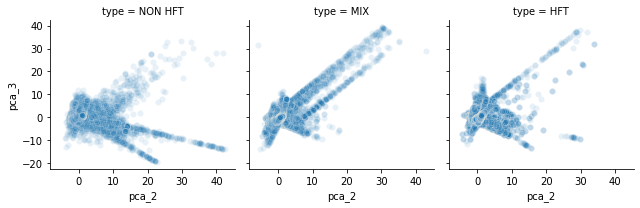

In [19]:
g.map(sns.scatterplot, 'pca_2', 'pca_3', alpha=.1, )

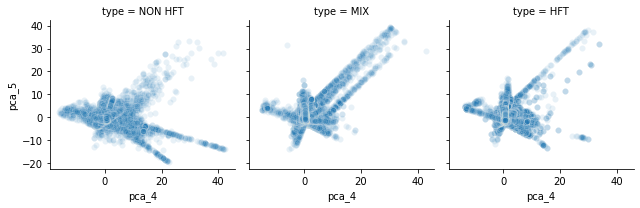

In [20]:
g.map(sns.scatterplot, 'pca_4', 'pca_5', alpha=.1, )

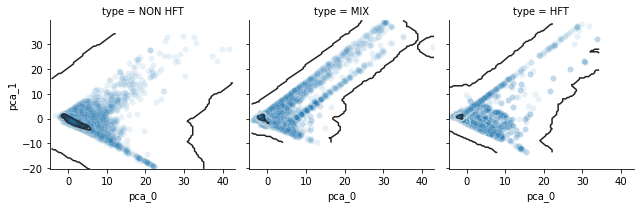

In [14]:
g.map(sns.kdeplot, 'pca_0', 'pca_1')

In [ ]:
g = sns.FacetGrid(data=x_train_scaled.groupby('type').apply(lambda x: x.sample(n=2000)), col='type')
g.map(sns.scatterplot, 'pca_0', 'pca_1', alpha=.3, )

In [22]:
pca.explained_variance_.cumsum()

array([ 8.40843002, 14.89498496, 17.68043625, 20.14629394, 22.1191389 ,
       23.81025317])

In [33]:
np.array(x_train_scaled.type)

array(['NON HFT', 'NON HFT', 'NON HFT', ..., 'NON HFT', 'NON HFT',
       'NON HFT'], dtype=object)

In [53]:
onehot = OneHotEncoder(sparse=False)
onehotencoded = pd.DataFrame(
    onehot.fit_transform(np.array(x_train_scaled.type).reshape(-1, 1)),
    columns=onehot.categories_[0].tolist(),
)
x_train_scaled = x_train_scaled.reset_index().join(onehotencoded)

# Classification linéaire des lignes

In [62]:
x_train_scaled[numeric_cols].drop('Index', axis=1).fillna(0.)

,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,75_p_time_two_events,90_p_time_two_events,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
0,-0.234316,-0.127020,-0.163583,-0.056435,0.470463,-0.063888,-0.119165,-0.093944,-0.359533,0.937537,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.511829
1,-0.238513,0.107288,-0.153818,-0.056435,-0.185661,-0.063888,-0.203653,-0.098566,-0.453049,-0.499046,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.494769
2,-0.240071,0.415368,-0.049751,-0.056435,-0.418488,-0.063888,-0.203654,-0.098566,-0.453341,-0.654949,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.420329
3,-0.238446,-0.041184,-0.145822,-0.056435,-0.119993,-0.063888,-0.202415,-0.098566,-0.447904,0.659476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.511829
4,-0.239816,0.129327,0.000000,-0.056435,-0.366792,-0.063888,-0.203654,-0.098566,-0.453677,-0.667255,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.459100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105777,-0.242495,0.077130,0.000000,-0.056435,-0.408418,-0.063888,-0.203654,-0.098566,-0.453890,-0.600295,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.513379
105778,-0.241017,0.077130,0.000000,-0.056435,-0.543385,-0.063888,-0.203654,-0.098566,-0.447101,-0.664896,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.507176
105779,-0.242520,0.954043,0.000000,-0.056435,-0.414046,-0.063888,-0.203654,-0.098566,-0.453792,-0.686089,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.493219
105780,-0.242283,2.596516,0.000000,-0.056435,-0.478949,-0.063888,-0.203654,-0.098566,-0.453767,-0.678085,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.463753


In [65]:
linear_clf.max_iter

100

In [66]:
linear_clf = LogisticRegression(max_iter=500)
linear_clf.fit(x_train_scaled[numeric_cols].drop('Index', axis=1).fillna(0.), x_train_scaled['HFT'])

LogisticRegression(max_iter=500)

In [69]:
x_train_scaled['HFT_pred'] = linear_clf.predict(x_train_scaled[numeric_cols].drop('Index', axis=1).fillna(0.))

,Trader,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,Share,Day,Index,...,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade,type,int_y,HFT,MIX,NON HFT,HFT_pred
0,Trader_10,1.265453,-0.130330,-0.584401,0.759097,-1.849396,-0.664518,Isin_8,Date_24,-1.732034,...,NaN,NaN,NaN,-0.511829,NON HFT,0,0.0,0.0,1.0,0.0
1,Trader_10,-0.416067,0.343482,-0.371292,0.123275,-0.149511,-0.302962,Isin_87,Date_29,-1.732002,...,NaN,NaN,NaN,-0.494769,NON HFT,0,0.0,0.0,1.0,0.0
2,Trader_10,-0.903781,0.797979,0.071209,0.368689,0.084000,-0.359762,Isin_87,Date_23,-1.731969,...,NaN,NaN,NaN,-0.420329,NON HFT,0,0.0,0.0,1.0,0.0
3,Trader_10,0.296146,-0.153084,-0.551014,0.299099,-0.251065,-0.829738,Isin_12,Date_11,-1.731936,...,NaN,NaN,NaN,-0.511829,NON HFT,0,0.0,0.0,1.0,0.0
4,Trader_10,0.113581,-0.119120,-0.685578,0.327889,0.131717,-0.450292,Isin_87,Date_9,-1.731903,...,NaN,NaN,NaN,-0.459100,NON HFT,0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105777,Trader_60,0.057809,0.352977,0.717392,1.586678,1.178481,0.179854,Isin_84,Date_27,1.731903,...,NaN,NaN,NaN,-0.513379,NON HFT,0,0.0,0.0,1.0,0.0
105778,Trader_60,-1.283999,1.317272,1.032004,0.858964,0.645391,-1.142759,Isin_102,Date_18,1.731936,...,NaN,NaN,NaN,-0.507176,NON HFT,0,0.0,0.0,1.0,0.0
105779,Trader_60,3.178716,-2.088387,-0.048649,3.389545,3.036608,1.656171,Isin_12,Date_13,1.731969,...,NaN,NaN,NaN,-0.493219,NON HFT,0,0.0,0.0,1.0,0.0
105780,Trader_60,2.357273,-1.497625,0.058168,3.115822,2.770632,1.497273,Isin_27,Date_30,1.732002,...,NaN,NaN,NaN,-0.463753,NON HFT,0,0.0,0.0,1.0,0.0


In [75]:
x_train_scaled.pivot_table(index='HFT', columns='HFT_pred', values='Index', aggfunc='count')

HFT_pred,0.0,1.0
HFT,,
0.0,68471,5361
1.0,13142,18808


['HFT', 'MIX', 'NON HFT']